# **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE303 Project Dataset/Dhaka_Delhi_merge_Dataset.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CSE303 Project Dataset/Dhaka_Delhi_merge_Dataset.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Analysing the Dataset With the Help of Visualization and Also Preprocess the Data**

In [ ]:
df.shape

(3654, 33)

In [ ]:
df.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [ ]:
df.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          2151
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          1970
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

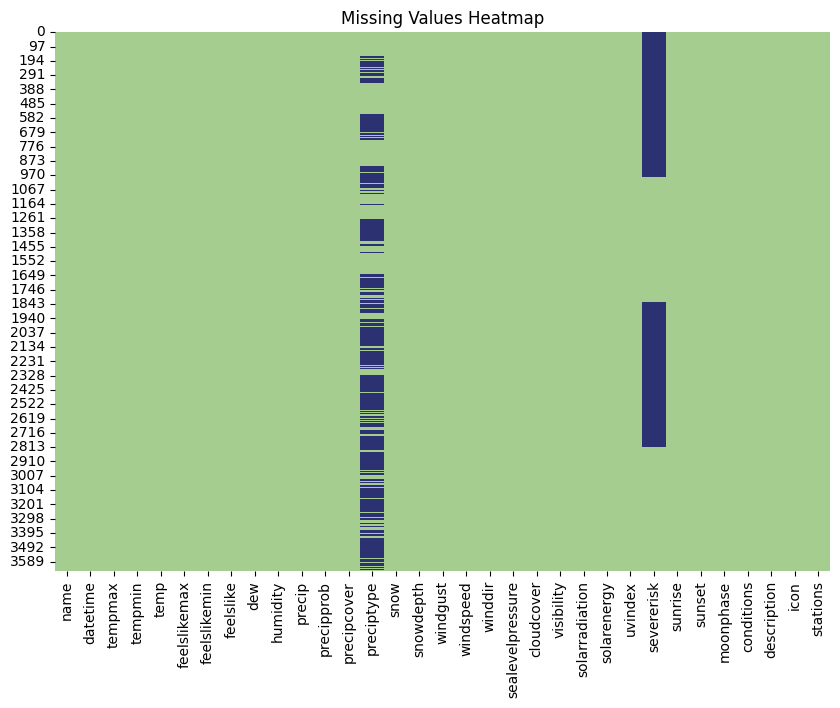

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))

sns.heatmap(df.isnull(), cbar = False, cmap = 'crest')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df['icon'].value_counts()

icon
rain                 1461
partly-cloudy-day    1109
clear-day            1007
fog                    73
wind                    3
cloudy                  1
Name: count, dtype: int64

In [ ]:
df['stations'].value_counts()

stations
42182099999,42176099999,VIDP,42139099999,42181099999                                        1105
VGHS,41922099999                                                                             565
VGHS,41941099999,41923099999,41929099999,41922099999,41939099999                             559
42182099999,42176099999,VIDP,42139099999,42181099999,VIDD                                    510
VGHS,41941099999,41923099999,41929099999,41922099999,41939099999,41909099999                 388
42182099999,42176099999,VIDP,42139099999,42181099999,remote                                  128
42182099999,42176099999,VIDP,42139099999,42181099999,VIDD,remote                              52
VGHS,41941099999,41923099999,41929099999,41922099999                                          51
VGHS,41923099999,41922099999,41939099999                                                      49
VGHS,41923099999,41922099999                                                                  35
VGHS,remote,419220999

In [ ]:
df['preciptype'].value_counts()

preciptype
rain    1503
Name: count, dtype: int64

In [ ]:
df['preciptype'] = df['preciptype'].fillna("not rain")
df['preciptype'].value_counts()

preciptype
not rain    2151
rain        1503
Name: count, dtype: int64

In [ ]:
df['severerisk'] = df['severerisk'].fillna(0)
df['severerisk'].value_counts()

severerisk
0.0      1970
10.0     1213
30.0      338
60.0       73
75.0       47
100.0      11
5.0         2
Name: count, dtype: int64

In [ ]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,31.026875,21.695457,26.038478,34.700465,22.818090,28.400438,18.676300,67.672113,3.594336,39.983580,...,17.267597,204.373837,1008.680159,44.088396,3.237904,209.675123,18.109278,7.550629,8.561850,0.483169
std,5.713972,6.442557,5.955648,8.502092,7.868563,8.062415,5.972939,14.337610,10.673020,48.993145,...,9.485224,90.730594,6.192119,29.782229,1.025260,60.692296,5.250931,1.664112,14.751037,0.288658
min,9.100000,3.000000,6.500000,7.900000,1.800000,5.700000,1.200000,17.800000,0.000000,0.000000,...,1.200000,0.600000,991.800000,0.000000,0.200000,3.800000,0.100000,0.000000,0.000000,0.000000
25%,27.900000,17.000000,22.200000,27.800000,17.000000,22.100000,13.900000,61.325000,0.000000,0.000000,...,12.900000,124.900000,1003.500000,15.900000,2.700000,171.600000,14.800000,7.000000,0.000000,0.250000
50%,32.000000,24.000000,28.100000,36.100000,24.000000,29.800000,19.500000,69.300000,0.000000,0.000000,...,16.500000,214.300000,1008.650000,45.750000,3.500000,208.650000,18.000000,8.000000,0.000000,0.480000
75%,34.800000,27.000000,30.200000,41.700000,30.100000,35.100000,24.300000,76.700000,1.900000,100.000000,...,20.400000,282.600000,1014.000000,69.900000,4.000000,251.600000,21.800000,9.000000,10.000000,0.750000
max,47.000000,33.600000,39.000000,57.700000,40.600000,47.000000,27.900000,99.300000,156.000000,100.000000,...,244.800000,360.000000,1024.200000,100.000000,17.900000,335.900000,29.100000,10.000000,100.000000,0.980000


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format = "%d/%m/%Y")
df['datetime']

0      2019-05-01
1      2019-05-02
2      2019-05-03
3      2019-05-04
4      2019-05-05
          ...    
3649   2024-04-26
3650   2024-04-27
3651   2024-04-28
3652   2024-04-29
3653   2024-04-30
Name: datetime, Length: 3654, dtype: datetime64[ns]

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df.dtypes

name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                 float64
sunrise                     object
sunset                      object
moonphase           

# **Prediction Model Using Logistic Regression**

## **Copying Dataset**

In [ ]:
df_logistic = df.copy()
df_logistic = df_logistic.drop(['datetime', 'snow', 'snowdepth'], axis = 'columns')
df_logistic['name'] = df_logistic['name'].str.lower()

In [ ]:
df_logistic.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month
0,dhaka,36.0,28.0,31.7,39.8,31.3,36.1,22.8,61.0,1.5,...,0.0,2019-05-01T05:24:54,2019-05-01T18:26:33,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"VGHS,41922099999",2019,5
1,dhaka,35.0,29.0,31.5,40.6,34.2,36.4,23.4,63.7,0.4,...,0.0,2019-05-02T05:24:12,2019-05-02T18:27:01,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"VGHS,41922099999",2019,5
2,dhaka,32.0,25.0,28.3,42.4,25.0,33.0,24.8,81.4,28.8,...,0.0,2019-05-03T05:23:31,2019-05-03T18:27:29,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"VGHS,41922099999",2019,5
3,dhaka,28.0,24.0,25.4,33.6,24.0,25.8,23.5,89.7,27.4,...,0.0,2019-05-04T05:22:51,2019-05-04T18:27:57,0.98,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"VGHS,41922099999",2019,5
4,dhaka,34.0,24.0,29.2,37.3,24.0,31.8,22.3,68.1,0.0,...,0.0,2019-05-05T05:22:12,2019-05-05T18:28:25,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VGHS,41922099999",2019,5


In [ ]:
df_logistic.dtypes

name                 object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
year                  int32
month                 int32
dtype: object

## **Label Encoding**

In [ ]:
df_logistic['sunrise'] = LabelEncoder().fit_transform(df_logistic['sunrise'])
df_logistic['sunset'] = LabelEncoder().fit_transform(df_logistic['sunset'])
df_logistic['icon'] = LabelEncoder().fit_transform(df_logistic['icon'])
df_logistic['conditions'] = LabelEncoder().fit_transform(df_logistic['conditions'])
df_logistic['stations'] = LabelEncoder().fit_transform(df_logistic['stations'])
df_logistic['description'] = LabelEncoder().fit_transform(df_logistic['description'])
df_logistic['name'] = LabelEncoder().fit_transform(df_logistic['name'])
df_logistic['preciptype'] = LabelEncoder().fit_transform(df_logistic['preciptype'])

df_logistic.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month
0,1,36.0,28.0,31.7,39.8,31.3,36.1,22.8,61.0,1.5,...,0.0,0,0,0.88,5,31,4,17,2019,5
1,1,35.0,29.0,31.5,40.6,34.2,36.4,23.4,63.7,0.4,...,0.0,2,2,0.91,5,31,4,17,2019,5
2,1,32.0,25.0,28.3,42.4,25.0,33.0,24.8,81.4,28.8,...,0.0,4,4,0.95,5,25,4,17,2019,5
3,1,28.0,24.0,25.4,33.6,24.0,25.8,23.5,89.7,27.4,...,0.0,6,6,0.98,4,17,4,17,2019,5
4,1,34.0,24.0,29.2,37.3,24.0,31.8,22.3,68.1,0.0,...,0.0,8,8,0.00,2,33,3,17,2019,5


In [ ]:
y = df_logistic['name']
x = df_logistic.drop(['name'], axis = 'columns')

model = LogisticRegression(random_state = 0, max_iter=10000)
model

LogisticRegression(max_iter=10000, random_state=0)

## **Sequential Feature Selector**

In [ ]:
selector = SequentialFeatureSelector(model, n_features_to_select = 4, scoring='accuracy')

selector.fit(x, y)
selected_features = selector.get_support()

In [ ]:
print('The selected features are:', list(x.columns[selected_features]))

The selected features are: ['dew', 'precipcover', 'cloudcover', 'stations']


In [ ]:
x = x[x.columns[selected_features]]
x

,dew,precipcover,cloudcover,stations
0,22.8,20.83,43.1,17
1,23.4,16.67,61.0,17
2,24.8,70.83,82.0,17
3,23.5,75.00,92.6,17
4,22.3,0.00,39.2,17
...,...,...,...,...
3649,11.9,4.17,44.4,4
3650,13.9,0.00,37.7,2
3651,10.9,0.00,49.5,3
3652,12.3,0.00,46.1,52


In [ ]:
df_logistic['name'].value_counts()

name
1    1827
0    1827
Name: count, dtype: int64

## **Grid Search for C**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
param_grid = {'C': [0.1, 0.5, 1, 10, 20, 30]}
grid = GridSearchCV(model, param_grid, cv = 5)

grid.fit(x_train, y_train)

grid_predictions = grid.predict(x_test)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.1}
Best Score: 0.9968711778375734


In [ ]:
model = LogisticRegression(random_state = 0, max_iter=10000, C = 0.1)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=10000, random_state=0)

In [ ]:
model.intercept_

array([-7.6299613])

In [ ]:
model.coef_

array([[ 0.13380505,  0.12515762, -0.02810003,  0.4791898 ]])

In [ ]:
model.predict_proba(x_train)

array([[9.93058049e-01, 6.94195079e-03],
       [9.91573725e-01, 8.42627516e-03],
       [3.42168516e-11, 1.00000000e+00],
       ...,
       [9.72695992e-01, 2.73040084e-02],
       [9.95779550e-01, 4.22045033e-03],
       [7.95954222e-07, 9.99999204e-01]])

In [ ]:
model.predict_proba(x_test)

array([[9.92225343e-01, 7.77465686e-03],
       [6.19760021e-10, 9.99999999e-01],
       [9.91593013e-01, 8.40698746e-03],
       ...,
       [9.87383867e-01, 1.26161327e-02],
       [9.98291021e-01, 1.70897928e-03],
       [9.93801372e-01, 6.19862815e-03]])

In [ ]:
model.predict(x_train)

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
model.score(x_train, y_train)

0.9972624168947986

In [ ]:
model.score(x_test, y_test)

0.9972652689152234

In [ ]:
confusion_matrix(y_train, model.predict(x_train))

array([[1289,    6],
       [   1, 1261]])

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[529,   3],
       [  0, 565]])

In [ ]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1295
           1       1.00      1.00      1.00      1262

    accuracy                           1.00      2557
   macro avg       1.00      1.00      1.00      2557
weighted avg       1.00      1.00      1.00      2557



In [ ]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       532
           1       0.99      1.00      1.00       565

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



<Axes: >

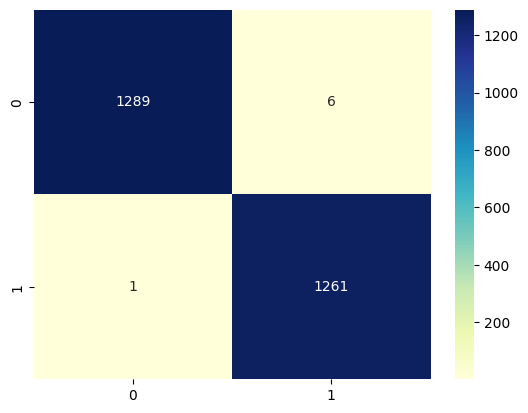

In [ ]:
cm = confusion_matrix(y_train, model.predict(x_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

<Axes: >

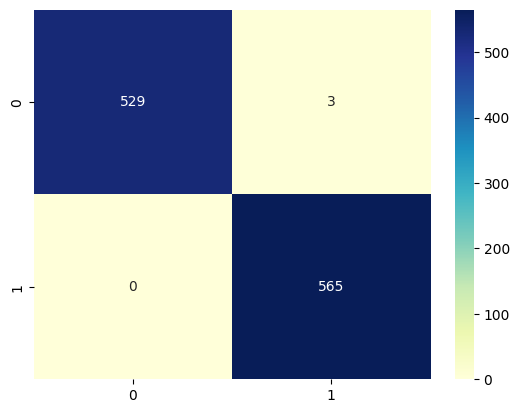

In [ ]:
cm = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print('For Training Dataset:')
print('Accuracy =', accuracy_score(y_train, model.predict(x_train)))
print('Precision =', precision_score(y_train, model.predict(x_train)))
print('Recall =', recall_score(y_train, model.predict(x_train)))
print('F1 Score =', f1_score(y_train, model.predict(x_train)))

For Training Dataset:
Accuracy = 0.9972624168947986
Precision = 0.9952644041041832
Recall = 0.9992076069730587
F1 Score = 0.9972321075523923


In [ ]:
print('For Testing Dataset:')
print('Accuracy =', accuracy_score(y_test, model.predict(x_test)))
print('Precision =', precision_score(y_test, model.predict(x_test)))
print('Recall =', recall_score(y_test, model.predict(x_test)))
print('F1 Score =', f1_score(y_test, model.predict(x_test)))

For Testing Dataset:
Accuracy = 0.9972652689152234
Precision = 0.9947183098591549
Recall = 1.0
F1 Score = 0.997352162400706


# **SVM**

In [ ]:
svm = SVC()

## **Grid Search for C**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
param_grid = {'C': [0.1, 0.5, 1, 10, 20, 30]}
grid = GridSearchCV(svm, param_grid, cv = 5)

grid.fit(x_train, y_train)

grid_predictions = grid.predict(x_test)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 20}
Best Score: 0.9980438172700588


In [ ]:
svm = SVC(C = 20)
svm

SVC(C=20)

In [ ]:
svm.fit(x_train, y_train)

SVC(C=20)

In [ ]:
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

0.9988267500977708
0.9981768459434822


In [ ]:
confusion_matrix(y_train, svm.predict(x_train))

array([[1293,    2],
       [   1, 1261]])

In [ ]:
confusion_matrix(y_test, svm.predict(x_test))

array([[531,   1],
       [  1, 564]])

In [ ]:
print(classification_report(y_train, svm.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1295
           1       1.00      1.00      1.00      1262

    accuracy                           1.00      2557
   macro avg       1.00      1.00      1.00      2557
weighted avg       1.00      1.00      1.00      2557



In [ ]:
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       532
           1       1.00      1.00      1.00       565

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



<Axes: >

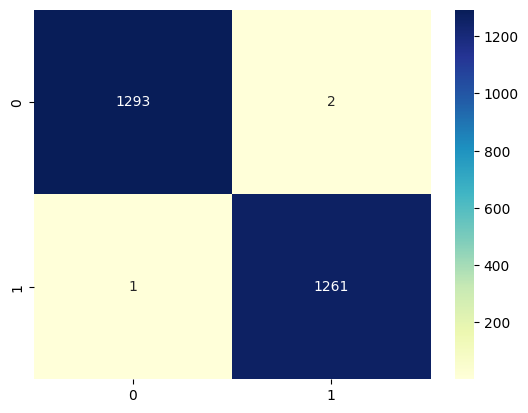

In [ ]:
cm = confusion_matrix(y_train, svm.predict(x_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

<Axes: >

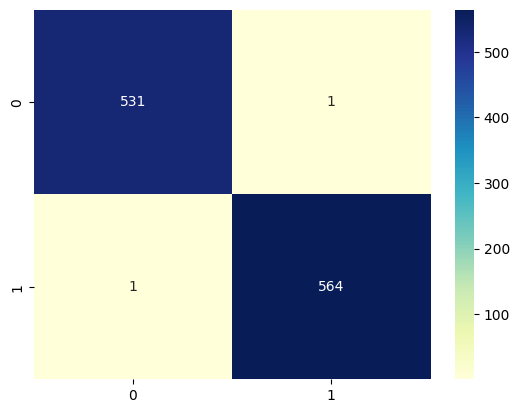

In [ ]:
cm = confusion_matrix(y_test, svm.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print('For Training Dataset:')
print('Accuracy =', accuracy_score(y_train, svm.predict(x_train)))
print('Precision =', precision_score(y_train, svm.predict(x_train)))
print('Recall =', recall_score(y_train, svm.predict(x_train)))
print('F1 Score =', f1_score(y_train, svm.predict(x_train)))

For Training Dataset:
Accuracy = 0.9988267500977708
Precision = 0.9984164687252574
Recall = 0.9992076069730587
F1 Score = 0.9988118811881188


In [ ]:
print('For Testing Dataset:')
print('Accuracy =', accuracy_score(y_test, svm.predict(x_test)))
print('Precision =', precision_score(y_test, svm.predict(x_test)))
print('Recall =', recall_score(y_test, svm.predict(x_test)))
print('F1 Score =', f1_score(y_test, svm.predict(x_test)))

For Testing Dataset:
Accuracy = 0.9981768459434822
Precision = 0.9982300884955753
Recall = 0.9982300884955753
F1 Score = 0.9982300884955753
